<h1 style="text-align:center"> NYC Open Data Week at TIQC</h1>
<h2 style="text-align:center"> Machine Learning</h2>

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width="200px" height="200px" align="center" >

<img src="https://opendata.cityofnewyork.us/wp-content/themes/opendata-wp/assets/img/nyc-open-data-logo.svg" width="200px" height="200px" align="left" >

<img src="https://techincubatorqc.com/wp-content/uploads/2020/02/cropped-TechIncubator_web_black_red_logo-1.png" width="200px" height="200px" align="right" padding="top" >



Machine learning involves building mathematical models to help
understand data. “Learning” enters the fray when we give these models tunable
parameters that can be adapted to observed data; in this way the program can be considered
to be “learning” from the data. Once these models have been fit to previously
seen data, they can be used to predict and understand aspects of newly observed data.

## Categories of Machine Learning

**Supervised learning** involves somehow modeling the relationship between measured
features of data and some label associated with the data; once this model is determined,
it can be used to apply labels to new, unknown data. This is further subdivided
into classification tasks and regression tasks: in classification, the labels are
discrete categories, while in regression, the labels are continuous quantities. We will
see examples of both types of supervised learning in the following section.<br>

**Unsupervised learning** involves modeling the features of a dataset without reference to
any label, and is often described as “letting the dataset speak for itself.” These models
include tasks such as clustering and dimensionality reduction. Clustering algorithms identify distinct groups of data, while dimensionality reduction algorithms search for
more succinct representations of the data. We will see examples of both types of
unsupervised learning in the following section.

**Semi-supervised learning methods**, which fall somewhere
between supervised learning and unsupervised learning. Semi-supervised
learning methods are often useful when only incomplete labels are available.

Terminology to discuss: overfitting and complexity, inference vs prediction

Source: [Python Data Science Handbook](https://www.oreilly.com/library/view/python-data-science/9781491912126)

# Table of Contents

<div class = "alert alert-info">

1. [EDA](#1)<br>
    
2. [Supervised Machine Learning](#2)<br>
    
3. [Unsupervised Machine Learning](#3) <br>
  
  

</div>
<hr>

## The Greener, Greater Buildings historical data set

New York's [Greener, Greater Buildings](https://www.nyc.gov/html/gbee/downloads/pdf/greener_greater_buildings_plan.pdf) program is a sustainable growth iniative that aims to reduce greenhouse gas emissions by 30%. The program focusses on large buildings which consume the most resources. The stewards of these buildings must annually release public benchmarks of water and energy use. The buildings will also go through retro commissioning and audits every decade to help reduce resource use. Finally, non-commercial residential buildings must meet improved lighting codes.

The open data sample contains 1000 observations of the energy use of buildings across New York City. The data contain information on the building's borough, neighborhood, owner, address, boiler type, fuel used, square footage, energy use, as well as if the building is part of the initative. Some of the features are a bit messy with miscoded values or types that are parsed incorrectly as Strings rather than numbers. 

## Exploratory Data Analysis<a id=1></a>

In [1]:
# Workshop libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Note: The pre requisite of this workshop is that participants pre-install the required libraries and Anaconda.

# Importing the Open NYC data

In [2]:
Data = pd.read_json("https://data.cityofnewyork.us/resource/8isn-pgv3.json")
Data.head()

,borough_block_lot,street_address,zip_code,borough,utility,building_manager,owner,owner_address,owner_telephone,dep_boiler_application,...,total_units,year_built,latitude,longitude,census_tract,bin,bbl,nta,coop,condo
0,1008120001,155 WEST 36 STREET,10018.0,Manhattan,Con Edison,485 7 AVE.ASSOC./COLLIERS,485 SHUR LLC,"485 7 AVENUE#777, MANHATTAN NY 10018",212-971-4000,CA160181H,...,70,1906,40.751828,-73.988595,109.0,1015235.0,1.008128e+09,Midtown-Midtown South,NaN,NaN
1,1008340048,330 5 AVENUE,10001.0,Manhattan,Con Edison,SKYLER 330 LLCC/O SHULSKY PROPERTIES INC.,SHULSKY PROPERTIES INC.,"307 FITH AVE, NY NY 10016",212 984-8370,CA323565K,...,62,1926,40.747521,-73.985239,76.0,1015853.0,1.008340e+09,Midtown-Midtown South,NaN,NaN
2,1008390009,49 WEST 37 STREET,10018.0,Manhattan,Con Edison,49 W 37 ST REALTY CO,49 W 37TH ST REALTY CO,"440 PARK AVENUE SOUTH, MANHATTAN NY 10016",212 685-6400,CA145582N,...,24,1925,40.751018,-73.984758,84.0,1015958.0,1.008390e+09,Midtown-Midtown South,NaN,NaN
3,1008670001,411 5 AVENUE,10016.0,Manhattan,Con Edison,ADMS& CO. REAL ESTATE,ADAMS & CO. LLC/FRED LIGUORI,"411 5 AVENUE, MANHATTAN NY 10016",212-679-5500,CA417870Y,...,1,1915,40.750430,-73.983098,82.0,1017191.0,1.008670e+09,Murray Hill-Kips Bay,NaN,NaN
4,1022420029,639 WEST 207 STREET,10034.0,Manhattan,Con Edison,WEINER REALTY,PINNACLE WASHINGTON HEIGHTS LLC,"P.O.BO. 1920, NEW YORK NY 10116",NaN,CA068682Y,...,58,1925,40.868598,-73.921780,303.0,1064990.0,1.022420e+09,Marble Hill-Inwood,NaN,NaN


<b>Data Provided by</b>
Mayor's Office of Sustainability (MOS)<br>
Source: https://data.cityofnewyork.us/City-Government/NYC-Clean-Heat-Dataset-Historical-/8isn-pgv3

In [4]:
Data.columns

Index(['borough_block_lot', 'street_address', 'zip_code', 'borough', 'utility',
       'building_manager', 'owner', 'owner_address', 'owner_telephone',
       'dep_boiler_application', '_6_deadline', 'boiler_model',
       'of_identical_boilers', 'boiler_capacity_gross_btu',
       'boiler_installation_date', 'boiler_age_range', 'est_retirement_year',
       'burner_model', 'primary_fuel', 'total_gallons_high',
       'total_gallons_low', 'total_mmbtu_high', 'total_mmbtu_low',
       'greener_greater_buildings', 'ggb_deadline', 'building_type',
       'city_council_district', 'city_community_board', 'bldg_sqft',
       'of_bldgs', 'of_floors', 'of_res_units', 'total_units', 'year_built',
       'latitude', 'longitude', 'census_tract', 'bin', 'bbl', 'nta', 'coop',
       'condo'],
      dtype='object')

In [245]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   borough_block_lot          1000 non-null   int64  
 1   street_address             1000 non-null   object 
 2   zip_code                   999 non-null    float64
 3   borough                    1000 non-null   object 
 4   utility                    1000 non-null   object 
 5   building_manager           1000 non-null   object 
 6   owner                      1000 non-null   object 
 7   owner_address              1000 non-null   object 
 8   owner_telephone            902 non-null    object 
 9   dep_boiler_application     1000 non-null   object 
 10  _6_deadline                1000 non-null   int64  
 11  boiler_model               998 non-null    object 
 12  of_identical_boilers       1000 non-null   int64  
 13  boiler_capacity_gross_btu  1000 non-null   float6

In [246]:
lookup_data = dict(zip(Data.borough_block_lot.unique(), Data.zip_code.unique()))   
lookup_data

{1008120001: 10018.0,
 1008340048: 10001.0,
 1008390009: 10016.0,
 1008670001: 10034.0,
 1022420029: 10021.0,
 1014220048: 10451.0,
 1022020033: 10452.0,
 1022340032: 10459.0,
 2023400208: 10453.0,
 2025120015: 10457.0,
 2025150009: 10458.0,
 2027030053: 10468.0,
 2028070070: 10467.0,
 1008670055: 10010.0,
 2028140082: 10280.0,
 2031470010: 10004.0,
 2031640041: 10006.0,
 2031840071: 10038.0,
 2033050010: 10007.0,
 2033240045: 10002.0,
 1008770042: 10013.0,
 1000160080: 10009.0,
 1000167509: 10012.0,
 1000167515: 10003.0,
 1000220013: 10014.0,
 1000280001: 11012.0,
 1000300005: 10011.0,
 1000520021: 10033.0,
 1000640015: 10017.0,
 1000640016: 10019.0,
 1000880005: 10036.0,
 1000880018: 10023.0,
 1003530047: nan,
 1000900014: 10024.0,
 1000907501: 10025.0}

# Data cleaning (placeholder)

To do:

Fix Borough.
Fix sqft.

Preprocessing notes: 
Average of low/high for feature engineering
Clean up building_type by collapsing categories

Plots for EDA (don't run yet):
fig_sqftgal, ax_sqftgal = plt.subplots(figsize=(12, 10))
sns.scatterplot(x="bldg_sqft", y="total_gallons_high", hue="greener_greater_buildings",
data=clean_heat, ax=ax_sqftgal)

In [3]:
# Descriptive categories
Data.primary_fuel.replace({"#6": "Residual fuel",
                           "#4": "Distillate fuel (#4)"}, inplace=True)

# The square feet variable is a String rather than an int
Data.bldg_sqft = pd.to_numeric(Data.bldg_sqft.str.replace("[\*|,]", "",
                                                          regex=True))

# Miscoded points
# The data contain a handful of very strange observations!
# At least three points pointed to City Hall with sixty times the gallons
# used of the next maximum observation. I attempted to research the odd points
# but found nothing; filtering them out is probably the safest bet.
Data.loc[(Data.total_gallons_high > 1000000) |
         (Data.total_gallons_low > 1000000) |
         (Data.total_gallons_high < 10) |
         (Data.total_gallons_low < 10),
         ["total_gallons_high", "total_gallons_low"]] = np.nan

# The MMBTU features had similar weirdness. For example, there are at least
# six samples with low > high while also having strange numbers that are much
# higher than the rest of the data.
Data.loc[(Data.total_mmbtu_high > 50000) |
         (Data.total_mmbtu_low > 50000) |
         (Data.total_mmbtu_high == 0) |
         (Data.total_mmbtu_low == 0),
         ["total_mmbtu_high", "total_mmbtu_low"]] = np.nan

# These features/columns encode NaNs as zero
zero_nans = ["_6_deadline", "ggb_deadline", "est_retirement_year",
            "boiler_installation_date"]

for col in zero_nans:
    Data[col].replace({0: np.nan}, inplace=True)
    
# Change ALL CAPS to title case
for all_caps in ["street_address", "building_manager",
                "owner", "owner_address"]:
    Data[all_caps] = Data[all_caps].str.title()

# List of (most) categorical columns
cats = ["borough", "primary_fuel", "utility",
       "greener_greater_buildings", "ggb_deadline",
       "of_identical_boilers", "building_type",
       "city_council_district", "city_community_board",
       "condo", "coop", "nta"] + zero_nans

# Convert the types of each categorical
for cat in cats:
    Data[cat] = Data[cat].astype("category")

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/super.jpg"> <a id=2></a>

## K-Nearest Neighbors (KNN)

KNN is simple yet performant supervised machine learning algorithm.

Let's say we have a problem where we're trying to label an unknown point, p, that may be _red_ or _blue_. A reasonable approach is to look at the p's _nearest neighbors._ If the point is closest to more blue then we classify it as blue and vice versa for red. We decide based on the _k_ nearest neighbors. For example, if the point is near three red with a _k_ of five then we can reasonably assume that p is red with a 60% chance (that is, $\frac{3}{5}=.6$).

In other words, birds of a feather flock together. Despite the seeming simplicity, KNN is a remarkably good algorithm. Let's look at a simple model to try out KNN.

### The scikit-learn pipeline via a simple model

In [247]:
from sklearn.neighbors import KNeighborsClassifier

X = Data[['of_bldgs', 'of_floors', 'of_res_units']]
y = Data['borough']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [251]:
#pass the number of clusters in our data 
knn = KNeighborsClassifier(n_neighbors = 5)

In [252]:
#train the classifier using training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [253]:
#predict the values 
knn.score(X_test, y_test)

0.988

The model is 98% accurate. 

In [256]:
data_prediction = knn.predict([[4, 16, 0]])


In [257]:

lookup_data[data_prediction[0]]

KeyError: 'Manhattan'

In [262]:
k_range = range(1,18)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

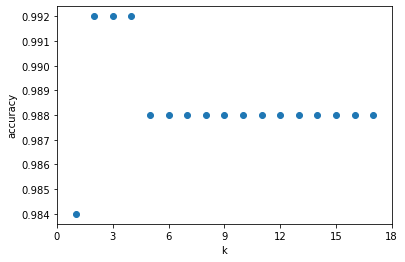

In [263]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,3,6,9,12, 15, 18]);

In [266]:
t = [0.984, 0.985, 0.986, 0.987, 0.989, 0.990, 0.991]

knn = KNeighborsClassifier(n_neighbors = 3)

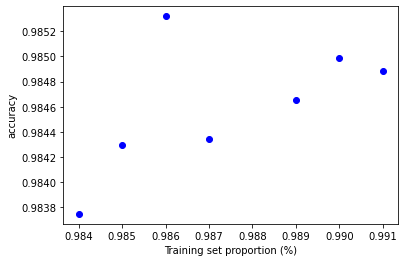

In [267]:
plt.figure()

for s in t:

    scores = [] #List for scores, but reset with each value in the list, t
    for i in range(1,1000): #Train for a 1,000 iterations 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test)) #Append scores
    plt.plot(s, np.mean(scores), 'bo') #Save the average value of these scores for this value in t

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

## Your Turn 

Please give the participants some challange


<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/unsup.jpg"> <a id=3></a>

## PCA 

In [223]:
Data = pd.read_json("https://data.cityofnewyork.us/resource/h5f7-3btz.json")

Data



,pub_dt,fisc_yr,agy_nm,exp,cap_repr,cap_mgtn
0,20200416,2021,Health and Hospitals Corporation,1.228660e+08,9.834587e+08,7.568733e+08
1,20200416,2021,Department of Parks and Recreation,9.447368e+07,7.748664e+08,2.451435e+08
2,20200416,2021,Department of Environmental Protection,6.169037e+08,2.635274e+08,2.948563e+08
3,20200416,2021,Department of Education / School Construction ...,9.488819e+07,5.443869e+08,1.916224e+08
4,20200416,2021,Department of Transportation,1.049950e+07,1.274047e+08,4.604212e+06
5,20200416,2021,Police Department,2.021640e+08,8.080028e+07,1.132206e+07
6,20200416,2021,Fire Department,2.547157e+07,1.996169e+08,4.047178e+06
7,20200416,2021,Department of Sanitation,1.771236e+08,2.905189e+07,1.100613e+07
8,20200416,2021,Department of Cultural Affairs,1.169097e+06,1.218306e+08,6.926632e+07
9,20200416,2021,Department of Corrections,3.375761e+06,7.047919e+07,1.498538e+07


In [224]:
#Standardize the Data

In [225]:
from sklearn.preprocessing import StandardScaler

In [226]:
x = Data[['exp', 'cap_repr', 'cap_mgtn']]

In [227]:
y = Data[['agy_nm']]

In [228]:
x = StandardScaler().fit_transform(x)

In [229]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #Set up the model, and we only want to collapse these data into two dimensions. 
principalComponents = pca.fit_transform(x) #Take our data--saved as x--and run the model.

In [230]:
#Now let's take the results--saved as principalComponents--and save it to a DataFrame.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [231]:
finalDf = pd.concat([principalDf, Data[['agy_nm']]], axis = 1)

In [232]:
finalDf.head()

,principal component 1,principal component 2,agy_nm
0,1.763721,-0.742329,Health and Hospitals Corporation
1,0.525637,-0.545801,Department of Parks and Recreation
2,0.896682,2.839576,Department of Environmental Protection
3,0.075826,-0.346903,Department of Education / School Construction ...
4,-1.065777,-0.442990,Department of Transportation


In [233]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

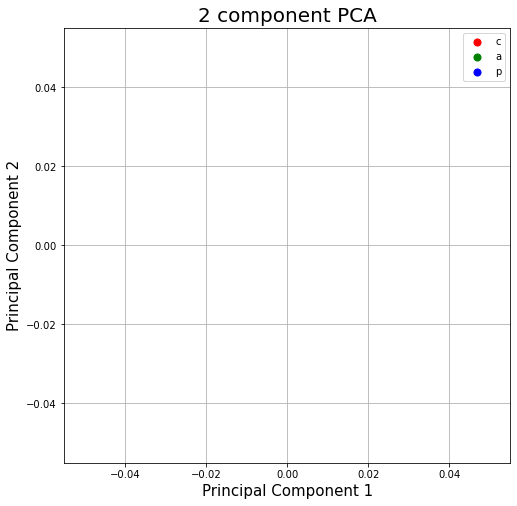

In [234]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
agy_nm = ['exp', 'cap_repr', 'cap_mgtn']
colors = ['r', 'g', 'b']
for agy_nm, color in zip(agy_nm,colors):
    indicesToKeep = finalDf['agy_nm'] == agy_nm
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(agy_nm)
ax.grid()